<a href="https://colab.research.google.com/github/marissawalker/data-quality-odw-2020/blob/master/GW170817_glitch_qscans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# -- Uncomment following line if running in Google Colab
! pip install -q 'gwpy==1.0.1'

In [0]:
%matplotlib inline
import gwpy
from gwosc.datasets import find_datasets
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from gwpy.segments import DataQualityFlag

### Get data around GW170817

In [3]:
# use find_datasets to find the event name
events = find_datasets(type='event',match='170817')
print(events)

['GW170817', 'GW170817_R1', 'O1_O2_Preliminary_GW170817_R1']


In [4]:
# get the gps time of the event
gps = event_gps('GW170817')
print(gps)

1187008882.4


In [5]:
# get 10 seconds of Livingston data around the event
segment = (int(gps)-5, int(gps)+5)
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)

Fetched 1 URLs from www.gw-openscience.org for [1187008877 .. 1187008887))
Reading data... [Done]


## Plot the q transform of the data

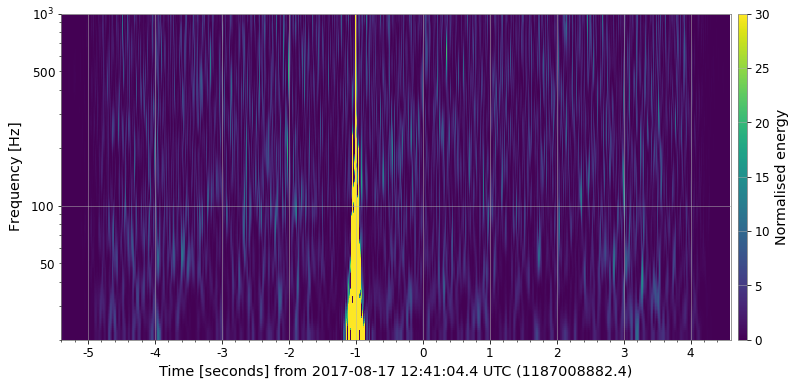

In [6]:
# Make a q transform of the data
qtrans = ldata.q_transform(frange=(20,1000), qrange=(4,100))
plot = qtrans.plot()
plot.colorbar(label="Normalised energy")
ax = plot.gca()
ax.set_epoch(gps)
ax.set_ylim(20,1000)
ax.set_yscale("log")
plot.colorbars[0].mappable.set_clim(0,30)

## Compare the q transform with the data quality segments for different analyses

In [0]:
# Find the Livingston "CAT 2" data quality flags for burst and CBC searches
L1burst_segs = DataQualityFlag.fetch_open_data('L1_BURST_CAT2', segment[0],segment[1] )
L1CBC_segs = DataQualityFlag.fetch_open_data('L1_CBC_CAT2', segment[0],segment[1] )

In [8]:
# print the active segments for both searches. The CBC segments are active for 
# the entire segment, while the burst search has two different segments. 
print(L1CBC_segs.active)
print(L1burst_segs.active)


[[1187008877 ... 1187008887)]
[[1187008877 ... 1187008880)
 [1187008884 ... 1187008887)]


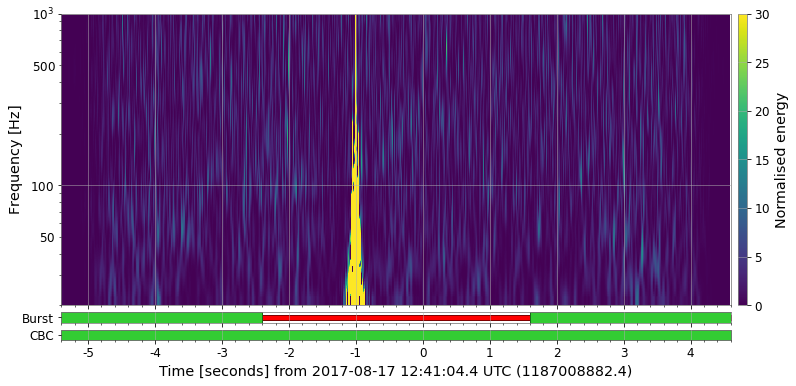

In [9]:
# Now let's see what the segments look like along with the q transform
# q transform
qtrans = ldata.q_transform(frange=(20,1000), qrange=(4,100))
plot = qtrans.plot()
plot.colorbar(label="Normalised energy")
ax = plot.gca()
ax.set_epoch(gps)
ax.set_ylim(20,1000)
ax.set_yscale("log")
plot.colorbars[0].mappable.set_clim(0,30)

plot.add_state_segments(L1burst_segs, label='Burst')
plot.add_state_segments(L1CBC_segs, label='CBC')

plot.savefig('L1_170817_glitch_qtrans.png')


From the plot with the burst and CBC data quality segments, we can see that all of the data is included in the template-based CBC searches, since the matched filter can usually reject glitches like this. However, searches for generic transient noise (burst searches) exclude a few seconds because of the large glitch. 